In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, roc_auc_score, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # 0 = malignant, 1 = benign


In [7]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (optional but useful for convergence)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.979020979020979


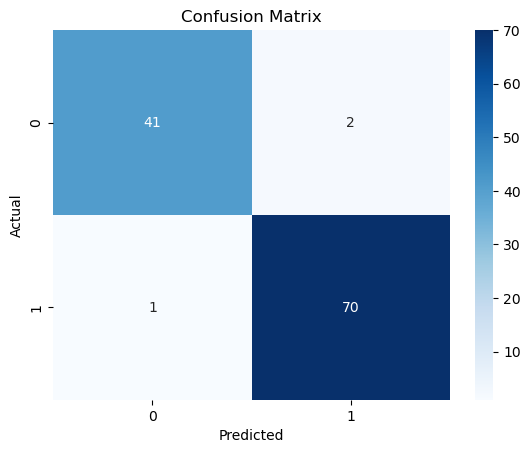

In [4]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

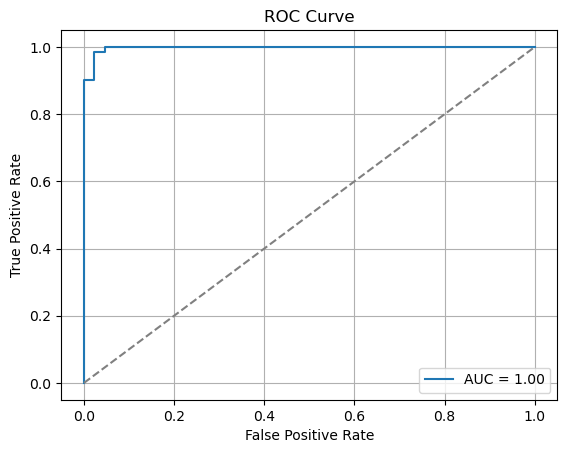

In [5]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [10]:
auc_score

0.99737962659679

In [6]:
# Optional: View top features
feature_weights = pd.Series(model.coef_[0], index=X.columns)
print("Top 5 positive features:\n", feature_weights.sort_values(ascending=False).head())
print("Top 5 negative features:\n", feature_weights.sort_values().head())

Top 5 positive features:
 compactness error          0.685972
fractal dimension error    0.613405
mean compactness           0.542106
symmetry error             0.499980
mean symmetry              0.235713
dtype: float64
Top 5 negative features:
 worst texture         -1.342188
radius error          -1.271147
worst symmetry        -1.208531
mean concave points   -1.117021
worst concavity       -0.945714
dtype: float64


In [17]:
feature_weights

mean radius               -0.427896
mean texture              -0.393913
mean perimeter            -0.389550
mean area                 -0.464316
mean smoothness           -0.066754
mean compactness           0.542106
mean concavity            -0.796771
mean concave points       -1.117021
mean symmetry              0.235713
mean fractal dimension     0.076701
radius error              -1.271147
texture error              0.188640
perimeter error           -0.609366
area error                -0.909800
smoothness error          -0.312461
compactness error          0.685972
concavity error            0.180815
concave points error      -0.317692
symmetry error             0.499980
fractal dimension error    0.613405
worst radius              -0.878610
worst texture             -1.342188
worst perimeter           -0.587557
worst area                -0.846559
worst smoothness          -0.549945
worst compactness          0.005207
worst concavity           -0.945714
worst concave points      -0

In [16]:
# Using Perceptron for the same data set

from sklearn.linear_model import Perceptron

# Initialize and train perceptron
clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[42  1]
 [ 2 69]]


In [18]:
# SVM demo
from sklearn.datasets import make_moons
from sklearn.svm import SVC


# Step 1: Generate non-linearly separable data
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Step 2: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [19]:
# Step 3: Fit SVM with RBF kernel
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.93      0.96        28

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.97        60
weighted avg       0.97      0.97      0.97        60



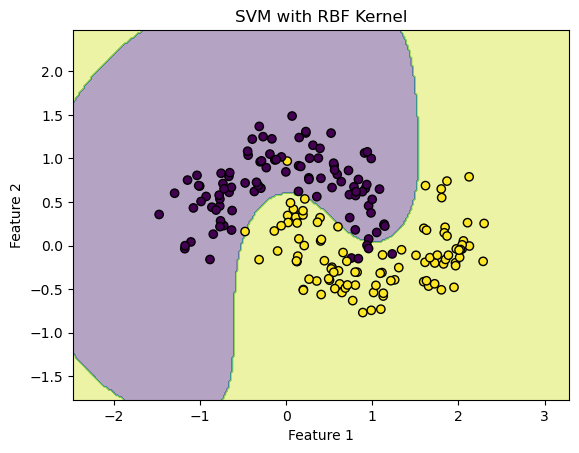

In [20]:
# Step 5: Plot decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title("SVM with RBF Kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


plot_decision_boundary(model, X, y)

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


# 1. Load the dataset (use subset for quick demo)
categories = ['rec.sport.baseball', 'sci.med', 'comp.graphics', 'talk.politics.mideast']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.3, random_state=42)

In [5]:
X_train[0]

'From: aron@tikal.ced.berkeley.edu (Aron Bonar)\nSubject: Re: Photoshop for Windows\nOrganization: University of California, Berkeley\nLines: 26\nDistribution: world\nNNTP-Posting-Host: tikal.ced.berkeley.edu\n\nIn article <1993Apr22.011720.28958@midway.uchicago.edu>, dgf1@quads.uchicago.edu (David Farley) writes:\n|> In article <C5uHIM.JFq@rot.qc.ca> beaver@rot.qc.ca (Andre Boivert) writes:\n|> >\n|> >\n|> >I am looking for comments from people who have used/heard about PhotoShop\n|> >for Windows. Is it good? How does it compare to the Mac version? Is there\n|> >a lot of bugs (I heard the Windows version needs "fine-tuning)?\n|> >\n|> >Any comments would be greatly appreciated..\n|> >\n|> >Thank you.\n|> >\n|> >Andre Boisvert\n|> >beaver@rot.qc.ca\n|> >\n|> An review of both the Mac and Windows versions in either PC Week or Info\n|> World this week, said that the Windows version was considerably slower\n|> than the Mac.  A more useful comparison would have been between PhotoStyler\n|>

In [7]:
y_train

array([0, 1, 3, ..., 2, 1, 0])

In [35]:
# 3. Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [36]:
# 4. Train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [37]:
# 5. Predict and evaluate
y_pred = nb_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups.target_names))

Accuracy: 0.9837606837606837

Classification Report:
                        precision    recall  f1-score   support

        comp.graphics       0.99      0.99      0.99       305
   rec.sport.baseball       0.97      1.00      0.99       304
              sci.med       0.99      0.96      0.98       290
talk.politics.mideast       0.98      0.99      0.99       271

             accuracy                           0.98      1170
            macro avg       0.98      0.98      0.98      1170
         weighted avg       0.98      0.98      0.98      1170

